<h3 style="text-align: center;">
Emory University - Department of Economics
</h3>

<h4 style="text-align: center;">
Prof. Maria Arbatskaya, Ph.D.
</h4>

<h5 style="text-align: center;">
Student: Fareed Wajid Khan 

Date: December 11th, 2023
</h5>

### Table of contents

0. Packages and some specific settings
1. Access Keepa API
2. Amazon categories
3. Product history query
4. Variation query
5. Top sellers query

### 0. Packages and some specific settings

In [1]:
pip install aiohttp

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keepa

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install asyncio

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aiohttp
import tqdm
import keepa
import os
import asyncio

#plt.style.use('whitegrid') # Matplotlib style
plt.rcParams['figure.figsize'] = [6, 3] # Matplotlib figure size

# Set working directory (change to your own)
path = "/Users/zkhan/fareed2"
os.chdir(path)

### 1. Access Keepa API

In [8]:
# Read in Prof. Arbatskaya's API key
accesskey = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0' # enter real access key here
api = keepa.Keepa(accesskey)

### 2. Amazon Categories

In [7]:
categories = api.category_lookup(0) # api.category_lookup is a function defined by Keepa
for id in categories:
    print(id, categories[id]['name']) #37 root categories in total

133140011 Kindle Store
9013971011 Video Shorts
2350149011 Apps & Games
165796011 Baby Products
163856011 Digital Music
13727921011 Alexa Skills
165793011 Toys & Games
2972638011 Patio, Lawn & Garden
283155 Books
2617941011 Arts, Crafts & Sewing
229534 Software
3375251 Sports & Outdoors
2238192011 Gift Cards
468642 Video Games
11260432011 Handmade Products
7141123011 Clothing, Shoes & Jewelry
1064954 Office Products
16310101 Grocery & Gourmet Food
228013 Tools & Home Improvement
2625373011 Movies & TV
11091801 Musical Instruments
4991425011 Collectibles & Fine Art
2619525011 Appliances
2619533011 Pet Supplies
2335752011 Cell Phones & Accessories
16310091 Industrial & Scientific
10272111 Everything Else
5174 CDs & Vinyl
3760911 Beauty & Personal Care
1055398 Home & Kitchen
265523 Stores
172282 Electronics
15684181 Automotive
599858 Magazine Subscriptions
3760901 Health & Household
18145289011 Audible Books & Originals


In [1]:
import keepa
import pandas as pd

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the API
api = keepa.Keepa(access_key)

# Define the category ID for the best seller category
category_id = '3760901'  # Replace with actual category ID

# Query the best sellers in the category
best_sellers = api.best_sellers_query(category_id)

# The data structure of 'best_sellers' depends on Keepa's response format. 
# Assuming it returns a list of product information, you can directly convert it to a DataFrame.
# If the data structure is different, you might need to process it accordingly before creating the DataFrame.

df = pd.DataFrame(best_sellers)

/Users/zkhan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import keepa
import pandas as pd

# Define the extract function to handle NumPy arrays (you will need to update this based on the actual structure of the Keepa API response)
def extract(product, data_key, info_key, var_name):
    # This function needs to be updated based on the actual data structure
    # For now, it assumes a simple list with alternating time and price values
    data_array = product[data_key][info_key]
    time_data = data_array[::2]  # Even indices: Time data
    value_data = data_array[1::2]  # Odd indices: Value data

    # Ensure both arrays are of the same length
    min_length = min(len(time_data), len(value_data))
    time_data = time_data[:min_length]
    value_data = value_data[:min_length]

    # Create a DataFrame
    df = pd.DataFrame({ 'time': time_data, var_name: value_data })
    return df

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Provided list of ASINs for the 50 top best sellers in Health and Household
asins_list = ["B07MHJFRBJ", "B002DYIZGM", "B07FKRBV8Y", "B079H53D2B", "B00C91Q86I",
    "B01DDMTX0Y", "B00DZR75G2", "B07QV942J6", "B098JJJ6SX", "B0798DVT68",
    "B09YKYG6W8", "B09YKYV9N9", "B07ND3WR64", "B002UXRXE6", "B0035LCFNQ",
    "B07QX36HYD", "B07QBXPT2F", "B09QV3XG8B", "B0CHWGV7GZ", "B00Y8MP4G6",
    "B0CB9NV7WJ", "B09F8NLMJ4", "B09R2H6LWC", "B081QWQFTX", "B00IL4HT06",
    "B07Y2FN64J", "B0B9ZYKL21", "B016OZN8U8", "B01IADXHZI", "B001F51QCK",
    "B00K6JUG4K", "B08XXDQY5M", "B071D4DKTZ", "B07ND5BB8V", "B00004YK1B",
    "B0B6GSQ61S", "B09NMJHY64", "B0BNLRJ2SQ", "B0B67Y8MB4", "B09NW92T8Q",
    "B09X1SHMRK", "B01IT9NLHW", "B00OBQZDXS", "B01MA6LPQR", "B07BVYZL88",
    "B07DY89QMT", "B07FF4WBV8", "B008KJEYLO", "B07TT8B1JJ", "B07HKR2QP9",
    "B09CY8G5HB", "B0B6ZXFRY7", "B0BQ2BSX1W", "B07P5K7DQP", "B01BZ0LXL8",
    "B0B24SV6BN", "B0BFM8TM19", "B0BDP6GN3W", "B0748J34WZ", "B00AHAWWO0",
    "B09N9WGLTC", "B0B4FFH4XW", "B00IRKRK9O", "B07ND3MW45", "B01NAPQ4QP",
    "B002R0DXQE", "B002CQU54Q", "B00MV8MWEQ", "B082TPDTM2", "B0C1PC29DX",
    "B0B68LPB96", "B00FQT4LX2", "B084HQ4DYQ", "B09KHK2FPF", "B010NE2XPC",
    "B07B8BSGPL", "B00R1CSN5E", "B013JZMG5Y", "B07QPRV62S", "B0C35XNRDF",
    "B0BJT5BLZ1", "B006ZBT0OA", "B00CC6XSRC", "B0C35921LF", "B09RTVD1GF",
    "B092VKZB89", "B07JMCS6TV", "B00WSWGVZQ", "B0CHRN4PYH", "B0C898BY2Y",
    "B09YKRZR22", "B074F297T8", "B01BUNHFQM", "B009108SGS", "B099HZG89P",
    "B01HI7WON8", "B01HI7WP0U", "B01HI7WP28", "B0BR9G2Y9H", "B06Y5ZG66K"]

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in asins_list:
    try:
        products = api.query(asin, domain='US', history=True, rating=True)
        product = products[0]

        # Example: Extracting Amazon price data
        amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

        # Append this product's data to the DataFrame
        all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)
    except Exception as e:
        print(f"Error processing ASIN {asin}: {e}")

# Save the combined data to a CSV file
all_product_data.to_csv('best_sellers_product_data.csv', index=False)


  0%|          | 0/1 [00:00<?, ?it/s]Waiting 45 seconds for additional tokens


Error processing ASIN B01BZ0LXL8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3ce80>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0B24SV6BN: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a790>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0BFM8TM19: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59310>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))




  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0BDP6GN3W: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f590a0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0748J34WZ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cbe0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00AHAWWO0: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a1f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09N9WGLTC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744aee0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0B4FFH4XW: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364670>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00IRKRK9O: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ac40>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B07ND3MW45: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1578b5310>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01NAPQ4QP: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cb50>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B002R0DXQE: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364d90>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B002CQU54Q: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b850>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B00MV8MWEQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a7f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B082TPDTM2: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c340>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0C1PC29DX: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364f70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0B68LPB96: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1578b5430>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B00FQT4LX2: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f595e0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B084HQ4DYQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cd00>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09KHK2FPF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744adc0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B010NE2XPC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634640>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B07B8BSGPL: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59dc0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00R1CSN5E: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364b20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B013JZMG5Y: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c700>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B07QPRV62S: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a460>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0C35XNRDF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b370>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0BJT5BLZ1: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59c70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B006ZBT0OA: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c130>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00CC6XSRC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1573646d0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))




  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0C35921LF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ae20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B09RTVD1GF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768bb80>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B092VKZB89: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59df0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B07JMCS6TV: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364eb0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00WSWGVZQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ac70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0CHRN4PYH: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768bc10>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0C898BY2Y: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364250>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09YKRZR22: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c4f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B074F297T8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59ee0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B01BUNHFQM: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634e20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B009108SGS: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59670>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B099HZG89P: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b730>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01HI7WON8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c370>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01HI7WP0U: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634580>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))







  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B01HI7WP28: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634640>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0BR9G2Y9H: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f595e0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B06Y5ZG66K: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c4f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


In [9]:
# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Provided list of ASINs for the 50 top best sellers in Health and Household
asins_list = ["B07MHJFRBJ", "B002DYIZGM", "B07FKRBV8Y", "B079H53D2B", "B00C91Q86I",
    "B01DDMTX0Y", "B00DZR75G2", "B07QV942J6", "B098JJJ6SX", "B0798DVT68",
    "B09YKYG6W8", "B09YKYV9N9", "B07ND3WR64", "B002UXRXE6", "B0035LCFNQ",
    "B07QX36HYD", "B07QBXPT2F", "B09QV3XG8B", "B0CHWGV7GZ", "B00Y8MP4G6",
    "B0CB9NV7WJ", "B09F8NLMJ4", "B09R2H6LWC", "B081QWQFTX", "B00IL4HT06",
    "B07Y2FN64J", "B0B9ZYKL21", "B016OZN8U8", "B01IADXHZI", "B001F51QCK",
    "B00K6JUG4K", "B08XXDQY5M", "B071D4DKTZ", "B07ND5BB8V", "B00004YK1B",
    "B0B6GSQ61S", "B09NMJHY64", "B0BNLRJ2SQ", "B0B67Y8MB4", "B09NW92T8Q",
    "B09X1SHMRK", "B01IT9NLHW", "B00OBQZDXS", "B01MA6LPQR", "B07BVYZL88",
    "B07DY89QMT", "B07FF4WBV8", "B008KJEYLO", "B07TT8B1JJ", "B07HKR2QP9",
    "B09CY8G5HB", "B0B6ZXFRY7", "B0BQ2BSX1W", "B07P5K7DQP", "B01BZ0LXL8",
    "B0B24SV6BN", "B0BFM8TM19", "B0BDP6GN3W", "B0748J34WZ", "B00AHAWWO0",
    "B09N9WGLTC", "B0B4FFH4XW", "B00IRKRK9O", "B07ND3MW45", "B01NAPQ4QP",
    "B002R0DXQE", "B002CQU54Q", "B00MV8MWEQ", "B082TPDTM2", "B0C1PC29DX",
    "B0B68LPB96", "B00FQT4LX2", "B084HQ4DYQ", "B09KHK2FPF", "B010NE2XPC",
    "B07B8BSGPL", "B00R1CSN5E", "B013JZMG5Y", "B07QPRV62S", "B0C35XNRDF",
    "B0BJT5BLZ1", "B006ZBT0OA", "B00CC6XSRC", "B0C35921LF", "B09RTVD1GF",
    "B092VKZB89", "B07JMCS6TV", "B00WSWGVZQ", "B0CHRN4PYH", "B0C898BY2Y",
    "B09YKRZR22", "B074F297T8", "B01BUNHFQM", "B009108SGS", "B099HZG89P",
    "B01HI7WON8", "B01HI7WP0U", "B01HI7WP28", "B0BR9G2Y9H", "B06Y5ZG66K"]
products = api.query(asins_list, domain='US', history=True, rating=True)
product = products[0]

def extract(product, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product[data][info]['time'] = product[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

100%|██████████| 100/100 [01:07<00:00,  1.49it/s]

In [28]:
# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

def extract(product, data, info, var):
    """
    This function extracts the time and value columns that are stored in 'info',
    in turn stored in the dictionary 'data' of a specific product.
    We rename the column 'value' as 'var'.
    """
    # Convert lists to DataFrame
    df = pd.DataFrame(product[data][info], columns=['time', 'value'])
    # Rename the 'value' column to something more descriptive
    df = df.rename(columns={'value': var})
    # Set the time as the index
    df = df.set_index('time')
    
    # Store the DataFrame in the global namespace
    globals()[f"product_{info}"] = df
    
    # Return the DataFrame
    return df
# Provided list of ASINs for the 50 top best sellers in Health and Household
asins_list = ["B07MHJFRBJ", "B002DYIZGM", "B07FKRBV8Y", "B079H53D2B", "B00C91Q86I",
    "B01DDMTX0Y", "B00DZR75G2", "B07QV942J6", "B098JJJ6SX", "B0798DVT68",
    "B09YKYG6W8", "B09YKYV9N9", "B07ND3WR64", "B002UXRXE6", "B0035LCFNQ",
    "B07QX36HYD", "B07QBXPT2F", "B09QV3XG8B", "B0CHWGV7GZ", "B00Y8MP4G6",
    "B0CB9NV7WJ", "B09F8NLMJ4", "B09R2H6LWC", "B081QWQFTX", "B00IL4HT06",
    "B07Y2FN64J", "B0B9ZYKL21", "B016OZN8U8", "B01IADXHZI", "B001F51QCK",
    "B00K6JUG4K", "B08XXDQY5M", "B071D4DKTZ", "B07ND5BB8V", "B00004YK1B",
    "B0B6GSQ61S", "B09NMJHY64", "B0BNLRJ2SQ", "B0B67Y8MB4", "B09NW92T8Q",
    "B09X1SHMRK", "B01IT9NLHW", "B00OBQZDXS", "B01MA6LPQR", "B07BVYZL88",
    "B07DY89QMT", "B07FF4WBV8", "B008KJEYLO", "B07TT8B1JJ", "B07HKR2QP9",
    "B09CY8G5HB", "B0B6ZXFRY7", "B0BQ2BSX1W", "B07P5K7DQP", "B01BZ0LXL8",
    "B0B24SV6BN", "B0BFM8TM19", "B0BDP6GN3W", "B0748J34WZ", "B00AHAWWO0",
    "B09N9WGLTC", "B0B4FFH4XW", "B00IRKRK9O", "B07ND3MW45", "B01NAPQ4QP",
    "B002R0DXQE", "B002CQU54Q", "B00MV8MWEQ", "B082TPDTM2", "B0C1PC29DX",
    "B0B68LPB96", "B00FQT4LX2", "B084HQ4DYQ", "B09KHK2FPF", "B010NE2XPC",
    "B07B8BSGPL", "B00R1CSN5E", "B013JZMG5Y", "B07QPRV62S", "B0C35XNRDF",
    "B0BJT5BLZ1", "B006ZBT0OA", "B00CC6XSRC", "B0C35921LF", "B09RTVD1GF",
    "B092VKZB89", "B07JMCS6TV", "B00WSWGVZQ", "B0CHRN4PYH", "B0C898BY2Y",
    "B09YKRZR22", "B074F297T8", "B01BUNHFQM", "B009108SGS", "B099HZG89P",
    "B01HI7WON8", "B01HI7WP0U", "B01HI7WP28", "B0BR9G2Y9H", "B06Y5ZG66K"]
products = api.query(asins_list, domain='US', history=True, rating=True)
product = products[0]

# Iterate over the returned product data and extract information
for product in products:
    for key in product['data'].keys():
        # Extract the data for the current key
        extract(product, 'data', key, key)

# Now, to print the DataFrames you've created, you can do the following:
for product in products:
    for key in product['data'].keys():
        df_name = f"product_{key}"
        if df_name in globals():
            print(f"DataFrame for {key}:")
            print(globals()[df_name])



100%|██████████| 100/100 [10:33<00:00,  6.34s/it]


100%|██████████| 100/100 [00:59<00:00,  1.68it/s]

ValueError: Shape of passed values is (1882, 1), indices imply (1882, 2)

In [9]:
import keepa
import pandas as pd
import numpy as np

def extract(product, data_key, info_key, var_name):
    """
    Extracts time and value information from a product's data,
    which is assumed to be in the format of a NumPy array.
    The 'time' information is every even-indexed element,
    and the 'value' information is every odd-indexed element in the array.
    """
    data_array = product[data_key][info_key]

    # Extracting time and value data assuming they are alternating in the array
    time_data = data_array[::2]  # Even indices: Time data
    value_data = data_array[1::2]  # Odd indices: Value data

    # Ensure both arrays are of the same length
    min_length = min(len(time_data), len(value_data))
    time_data = time_data[:min_length]
    value_data = value_data[:min_length]

    # Create a DataFrame
    df = pd.DataFrame({ 'time': time_data, var_name: value_data })

    return df

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Define the category ID for "Health and Household"
health_household_category_id = '3760901'  # Replace with actual category ID

# Request best sellers data for "Health and Household"
best_sellers_asins = api.best_sellers_query(health_household_category_id)

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in best_sellers_asins:
    products = api.query(asin, domain='US', history=True, rating=True)
    product = products[0]

    # Assuming you want to extract Amazon price data as an example
    amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

    # Append this product's data to the all_product_data DataFrame
    all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)

# Save the combined data to a CSV file
all_product_data.to_csv('health_household_product_data.csv', index=False)

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.08s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:04<00:00,  4.29s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:02<00:00,  2.42s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.56s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.38s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:00<00:00,  1.13it/s]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.48s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:01<00:00,  1.59s

100%|██████████| 1/1 [00:46<00:00, 46.96s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:02<00:00,  2.14s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.24s/it]








  0%|          | 0/1 [00:00<?, ?it/s]Waiting 66 seconds for additional tokens









100%|██████████| 1/1 [01:09<00:00, 69.55s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:02<00:00,  2.01s/it]













  0%|          | 0/1 [00:00<?, ?it/s]Waiting 43 seconds for additional tokens














100%|██████████| 1/1 [00:46<00:00, 46.38s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:02<00:00,  2.50s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:03<00:00,  3.61s/it]


















 ... (more hidden) ...Waiting 63 seconds for additional tokens



















100%|██████████| 1/1 [01:08<00:00,

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:01<00:00,  1.24s/it]




  0%|          | 0/1 [00:00<?, ?it/s]Waiting 45 seconds for additional tokens





100%|██████████| 1/1 [00:46<00:00, 46.52s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:02<00:00,  2.45s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.70s/it]







  0%|          | 0/1 [00:00<?, ?it/s]Waiting 66 seconds for additional tokens








100%|██████████| 1/1 [01:08<00:00, 68.45s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:03<00:00,  3.30s/it]









  0%|          | 0/1 [00:00<?, ?it/s]Waiting 43 seconds for additional tokens










100%|██████████| 1/1 [00:44<00:00, 44.63s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:02<00:00,  2.44s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:02<00:00,  2.01s/it

100%|██████████| 1/1 [00:48<00:00, 48.74s/it]

















100%|██████████| 1/1 [00:03<00:00,  3.03s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.32s/it]


  0%|          | 0/1 [00:00<?, ?it/s]Waiting 60 seconds for additional tokens



100%|██████████| 1/1 [01:04<00:00, 64.54s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:04<00:00,  4.86s/it]




  0%|          | 0/1 [00:00<?, ?it/s]Waiting 39 seconds for additional tokens





100%|██████████| 1/1 [00:44<00:00, 44.46s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:03<00:00,  3.72s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.95s/it]









  0%|          | 0/1 [00:00<?, ?it/s]Waiting 60 seconds for additional tokens










100%|██████████| 1/1 [01:03<00:00, 63.78s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:03<00:00,  3.31s/it]











 

100%|██████████| 1/1 [00:49<00:00, 49.11s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:03<00:00,  3.46s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:02<00:00,  2.67s/it]










  0%|          | 0/1 [00:00<?, ?it/s]Waiting 59 seconds for additional tokens











100%|██████████| 1/1 [01:03<00:00, 63.04s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


















 ... (more hidden) ...Waiting 40 seconds for additional tokens



















 ... (more hidden) ...Waiting 64 seconds for additional tokens
Waiting 45 seconds for additional tokens
100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


  0%|          | 0/1 [00:00<?, ?it/s]Waiting 67 seconds for additional tokens



100%|██████████| 1/1 [01:09<00:00, 69.75s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:0

  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:02<00:00,  2.50s/it]













  0%|          | 0/1 [00:00<?, ?it/s]Waiting 65 seconds for additional tokens














100%|██████████| 1/1 [01:07<00:00, 67.02s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


















 ... (more hidden) ...Waiting 44 seconds for additional tokens



















 ... (more hidden) ...

ReadTimeout: HTTPSConnectionPool(host='api.keepa.com', port=443): Read timed out. (read timeout=10)

In [ ]:
import keepa
import pandas as pd

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Define the extract function
def extract(product, data, info, var):
    # Function description here
    product[data][info]['time'] = product[data][info].index
    name = f"product_{info}"
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop=True)
    globals()[name] = globals()[name][['time', 'value']]
    globals()[name] = globals()[name].rename({'value': var}, axis=1)
    return globals()[name]
# Define the category ID for "Health and Household"
health_household_category_id = '3760901'  # Replace with actual category ID

# Request best sellers data for "Health and Household"
best_sellers_asins = api.best_sellers_query(health_household_category_id)

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in best_sellers_asins:
    products = api.query(asin, domain='US', history=True, rating=True)
    product = products[0]

    # Assuming you want to extract Amazon price data as an example
    amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

    # Append this product's data to the all_product_data DataFrame
    all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)

# Save the combined data to a CSV file
all_product_data.to_csv('health_household_product_data.csv', index=False)


In [ ]:
print(df)

### 3. Product History Query

In [11]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products = api.query('B01M0GB8CC', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product = products[0] #Access first product information

# Available variables
print(products[0].keys())

# Information of interest is stored in the 'data' key
print(product['data'].keys())






  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

dict_keys(['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'trackingSince', 'brand', 'productGroup', 'partNumber', 'model', 'color', 'size', 'edition', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees', 'variations', 'itemHeight', 'itemLength', 'itemWidth', 'itemWeight', 'salesRankReference', 'salesRanks', 'salesRankReferenc

##### Accessing product information

In [12]:
# --- Auxiliary function 'extract'
def extract(product, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product[data][info]['time'] = product[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

In [13]:
import keepa
import pandas as pd

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Define the category ID for "Health and Household"
health_household_category_id = '3760901'  # Replace with actual category ID

# Request best sellers data for "Health and Household"
best_sellers_asins = api.best_sellers_query(health_household_category_id)

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in best_sellers_asins:
    products = api.query(asin, domain='US', history=True, rating=True)
    product = products[0]

    # Assuming you want to extract Amazon price data as an example
    amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

    # Append this product's data to the all_product_data DataFrame
    all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)

# Save the combined data to a CSV file
all_product_data.to_csv('health_household_product_data.csv', index=False)








100%|██████████| 1/1 [00:10<00:00, 10.36s/it]






100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

                 time  Amazon Price
0 2016-05-30 12:56:00         21.30
1 2016-06-01 00:00:00           NaN
2 2016-08-28 06:06:00         23.99
3 2016-09-03 22:48:00         22.77
4 2016-09-04 02:48:00           NaN
5 2016-09-04 03:48:00         22.77
6 2016-09-04 22:48:00         22.90
7 2016-09-05 23:48:00         22.66
8 2016-09-06 22:48:00           NaN
9 2016-09-07 19:48:00         22.66


100%|██████████| 1/1 [01:41<00:00, 101.32s/it]


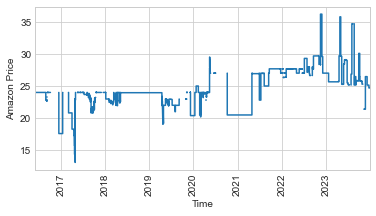

In [14]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
ax.set_xlim(time_data.min(), time_data.max())

# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

                 time  Marketplace Price
0 2016-05-30 12:56:00                NaN
1 2017-09-17 19:32:00              21.76
2 2017-09-17 20:48:00                NaN
3 2017-10-08 19:20:00              22.53
4 2017-10-08 21:46:00                NaN
5 2018-03-25 01:20:00              23.31
6 2018-03-25 02:08:00                NaN
7 2018-04-05 01:56:00              22.32
8 2018-04-05 02:48:00                NaN
9 2018-04-05 05:18:00              22.32


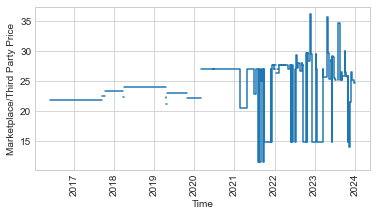

In [15]:
# --- Marketplace/3rd party new price history
marketplace_price = extract(product, 'data', 'df_NEW', 'Marketplace Price')
print(marketplace_price.head(10))

marketplace_price['Marketplace Price'] = marketplace_price['Marketplace Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'Marketplace Price' to numpy arrays for plotting
time_data = marketplace_price['time'].values
price_data = marketplace_price['Marketplace Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting axes labels and rotating the x-axis labels for better readability
ax.set(xlabel='Time', ylabel='Marketplace/Third Party Price')
plt.xticks(rotation='vertical')

plt.show()


                 time  List Price
0 2016-08-16 03:36:00       24.99
1 2016-08-25 11:50:00       23.99
2 2019-05-07 08:38:00       22.00
3 2019-05-16 10:44:00       22.99
4 2019-06-02 20:34:00       22.84
5 2019-06-04 20:12:00       22.69
6 2019-06-07 21:24:00       22.63
7 2019-06-08 20:44:00       22.49
8 2019-06-10 07:46:00       22.50
9 2019-06-28 00:00:00       23.99


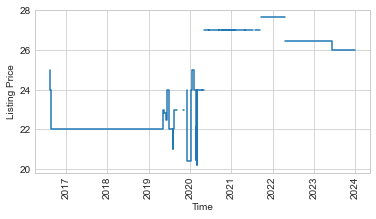

In [16]:
# --- List price history

list_price = extract(product, 'data', 'df_LISTPRICE', 'List Price')
print(list_price.head(10))
list_price['List Price'] = list_price['List Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'List Price' to numpy arrays for plotting
time_data = list_price['time'].values
listprice_data = list_price['List Price'].values

fig, ax = plt.subplots()
plt.step(time_data, listprice_data)
ax.set(xlabel='Time', ylabel='Listing Price')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# --- Sales rank history
sales_rank = extract(product, 'data', 'df_SALES', 'Sales Rank')
print(sales_rank.head(10))
time_data = sales_rank['time'].values
sales_rank_data = sales_rank['Sales Rank'].values

fig, ax = plt.subplots()
plt.step(time_data, sales_rank_data)
ax.set(xlabel='Time', ylabel='Sales Rank')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# --- Rating history
rating = extract(product, 'data', 'df_RATING', 'Rating')
print(rating.head(10))

rating['time'] = pd.to_datetime(rating['time'])
rating['Rating'] = pd.to_numeric(rating['Rating'], errors='coerce')  # Coerce non-numeric to NaN

# Drop rows with NaN values in either column
rating.dropna(subset=['time', 'Rating'], inplace=True)

# Convert to numpy arrays
time_data = rating['time'].values
rating_data = rating['Rating'].values

# Ensure both arrays have the same length
if len(time_data) != len(rating_data):
    raise ValueError("Length of 'time' and 'Rating' do not match")

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, rating_data)
ax.set(xlabel='Time', ylabel='Rating')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# --- Review count history
review_count = extract(product, 'data', 'df_COUNT_REVIEWS', 'Review Count')
print(review_count.head(10))

review_count.dropna(subset=['time', 'Review Count'], inplace=True)

# Convert to numpy arrays
time_data = review_count['time'].values
review_count_data = review_count['Review Count'].values

# Diagnostic print statements
print("Time Data Shape:", time_data.shape)
print("Review Count Data Shape:", review_count_data.shape)

# Ensure both arrays have the same length
if len(time_data) != len(review_count_data):
    raise ValueError("Length of 'time' and 'Review Count' do not match")

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, review_count_data)
ax.set(xlabel='Time', ylabel='Review Count')
plt.xticks(rotation='vertical')

plt.show()

### 4. Variation Query

In [ ]:
#Identify the ASINs of the variations of the Apple EarPods Headphones with Lightning Connector
print(product['variations'])
asins = [variation['asin'] for variation in product['variations']] #Variations are stored in a list of dictionaries called 'variations'
asins = np.asarray(asins) #Convert list to numpy array
print(asins)

In [ ]:
# Query info on variations
list_products = api.query(asins, domain = 'US', history = True, rating = True) #api.query is a function defined by Keepa

In [ ]:
# Obtain data for each variation
for index, product in enumerate(list_products, start = 1):
    info_name = f"product{index}"
    globals()[info_name] = product

In [ ]:
# Auxiliary function to extract the data of all the identified variations
def capture(product, data):
    values = {} #Create empty dictionary
    values['amazon_price'] = extract(product, 'data', 'df_AMAZON', 'Amazon Price') #Extract Amazon price
    values['marketplace_price'] = extract(product, 'data', 'df_NEW', 'Marketplace Price') #Extract Marketplace price
    values['list_price'] = extract(product, 'data', 'df_LISTPRICE', 'List Price') #Extract List price
    values['sales_rank'] = extract(product, 'data', 'df_SALES', 'Sales Rank') #Extract Sales rank
    values['rating'] = extract(product, 'data', 'df_RATING', 'Rating') #Extract Rating
    values['review_count'] = extract(product, 'data', 'df_COUNT_REVIEWS', 'Review Count') #Extract Review count
    return values

100%|██████████| 1/1 [00:15<00:00, 15.46s/it]

In [ ]:
# Example: Extract data for the first variation (i.e., product1)
product1_data = capture(product1, 'data')
product1_amazon_price = product1_data['amazon_price']
product1_marketplace_price = product1_data['marketplace_price']
product1_list_price = product1_data['list_price']
product1_sales_rank = product1_data['sales_rank']
product1_rating = product1_data['rating']
product1_review_count = product1_data['review_count']
print(product1_data)

In [ ]:
# Plot Amazon price history for the first variation
product1_amazon_price['Amazon Price'] = product1_amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' to datetime format (if not already in this format)
product1_amazon_price['time'] = pd.to_datetime(product1_amazon_price['time'])

# Extracting values for plotting
time_data = product1_amazon_price['time'].values
amazon_price_data = product1_amazon_price['Amazon Price'].values

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, amazon_price_data)
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Plot sales rank history for the first variation
time_data = product1_data['sales_rank']['time'].values
sales_rank_data = product1_data['sales_rank']['Sales Rank'].values

# Plotting the sales rank history
fig, ax = plt.subplots()
plt.step(time_data, sales_rank_data)
ax.set(xlabel='Time', ylabel='Sales Rank')
plt.xticks(rotation='vertical')

plt.show()

### 5. Top Sellers Query

In [ ]:
# Query 'Health & Household' category
hh_bestsellers = api.best_sellers_query('3760901', domain = 'US')
len(hh_bestsellers) #The query gets the top 500,000 selling products in the category

In [ ]:
# Print top 10 bestsellers of HH as of 2023-12-12
for bestseller in hh_bestsellers[:10]:
    print(bestseller)

In [ ]:
# Use the ASINs to query the top 10 bestsellers
hh_asins = hh_bestsellers[:10]
list_products = api.query(hh_asins, domain = 'US', history = True, rating = True)

In [ ]:
# Names of the top 10 bestsellers
for index, product in enumerate(list_products, start=1):
    print(f"Product {index}: ASIN - {product['asin']}, Name - {product['title']}")


### 6. Individual Price and Sales Rank Variant Comparison

In [ ]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products2 = api.query('B00OBQZDXS', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product2 = products2[0] #Access first product information

# Available variables
print(products2[0].keys())

# Information of interest is stored in the 'data' key
print(product2['data'].keys())

In [ ]:
# --- Auxiliary function 'extract'
def extract(product2, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product2[data][info]['time'] = product2[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product2_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product2[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

In [ ]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
print(time_data.min(), time_data.max())
# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
api = keepa.Keepa(accesskey)

# Single ASIN query
asins = np.asarray(['B0774D64LT'])
products = api.query(asins)


# Plot result (requires matplotlib)
keepa.plot_product(products[0])

In [ ]:
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
                      'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
                      'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        if timestamps and prices:
            # Convert Keepa timestamps to datetime objects for plotting
            dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

            # Plot each product's Amazon price history
            plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Duracell Coppertop AAA Batteries with Power Boost Ingredients, 20 Count Pack & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
         'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
         'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        print(dates)
        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B0B7S539BD','B09X1SHMRK']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])


# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

       
        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

plt.xlim(xmin=4000)
plt.ylim(ymin=0, ymax=70)
# Display the plot
plt.show()

In [ ]:
import keepa
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ASINs for the products
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Amazon Basics 9 Volt Performance All-Purpose Alkaline Batteries & Its Variants')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(bottom=0, top=100)

# Display the plot
plt.show()

In [3]:
# ASINs for the products
asins = ['B0779Z53SD','B00INOM4X6','B0B69RVHCJ','B008KJQMA0','B008KJEYLO']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of WaterWipes Plastic-Free Original Baby Wipes & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


  0%|          | 0/1 [5:22:22<?, ?it/s]

  0%|          | 0/1 [5:22:23<?, ?it/s]


NameError: name 'plt' is not defined

count the number of variation asin
predict the sales rank 

In [62]:
original_data = pd.read_csv("Keepa BestSellers Jan 18.csv")
modified_data = original_data.drop(['Locale', 'Image'], axis =1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def parse_sales_rank(row):
    if isinstance(row, str):
        parts = row.split('|')
        absolute_rank = parts[0].strip()
        top_1_percent = parts[1].strip()

        category_part = parts[-1].strip()
        category = category_part.split(';')[0].strip()

        return pd.Series([absolute_rank, top_1_percent, category])
    else:
        return pd.Series([None,None,None])


new_columns = original_data['Sales Rank: Subcategory Sales Ranks'].apply(parse_sales_rank)
new_columns.columns = ['Absolute Rank', 'Top 1 Percent', 'Category']
modified_data = pd.concat([modified_data, new_columns], axis=1)


#modified_data[['Absolute Rank', 'Top 1 Percent', 'Category']] = original_data['Sales Rank: Subcategory Sales Ranks'].apply(parse_sales_rank)
modified_data = modified_data.drop(['Sales Rank: Subcategory Sales Ranks'], axis =1)
modified_data = modified_data.drop(['Sales Rank: Reference'], axis =1)
modified_data['Absolute Rank'] = modified_data['Absolute Rank'].str.strip('# ')
modified_data['Absolute Rank'] = pd.to_numeric(modified_data['Absolute Rank'],errors='coerce')
modified_data = modified_data.drop(['Top 1 Percent'], axis =1)
modified_data.head()


,Title,Sales Rank: Current,Sales Rank: 90 days avg.,Sales Rank: Drops last 90 days,Bought in past month,Reviews: Rating,Reviews: Review Count,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Buy Box 🚚: Current,Buy Box 🚚: 90 days avg.,Buy Box 🚚: Stock,Buy Box 🚚: 90 days OOS,Buy Box Seller,Buy Box: Is FBA,Buy Box: Unqualified,Amazon: Current,Amazon: 90 days avg.,Amazon: 90 days OOS,New: Current,New: 90 days avg.,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 90 days avg.",FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 90 days avg.","New, Prime exclusive: Current","New, Prime exclusive: 90 days avg.",Lightning Deals: Current,Lightning Deals: Upcoming Deal,Buy Box Used 🚚: Current,Buy Box Used 🚚: 90 days avg.,Buy Box Used Seller,Buy Box Used: Is FBA,Buy Box Used: Condition,Used: Current,Used: 90 days avg.,Used: 90 days OOS,"Used, like new 🚚: Current","Used, like new 🚚: 90 days avg.","Used, very good 🚚: Current","Used, very good 🚚: 90 days avg.","Used, good 🚚: Current","Used, good 🚚: 90 days avg.","Used, acceptable 🚚: Current","Used, acceptable 🚚: 90 days avg.",Warehouse Deals: Current,Warehouse Deals: 90 days avg.,List Price: Current,List Price: 90 days avg.,Rental: Current,Rental: 90 days avg.,eBay New 🚚: Current,eBay New 🚚: 90 days avg.,eBay Used 🚚: Current,eBay Used 🚚: 90 days avg.,New Offer Count: Current,New Offer Count: 90 days avg.,"Count of retrieved live offers: New, FBA","Count of retrieved live offers: New, FBM",Used Offer Count: Current,Used Offer Count: 90 days avg.,Tracking since,Listed since,Categories: Root,Categories: Sub,Categories: Tree,Categories: Launchpad,ASIN,Product Codes: EAN,Product Codes: UPC,Product Codes: PartNumber,Parent ASIN,Variation ASINs,Freq. Bought Together,Type,Manufacturer,Brand,Product Group,Model,Variation Attributes,Color,Size,Edition,Format,Author,Contributors,Binding,Number of Items,Number of Pages,Publication Date,Release Date,Languages,Package: Dimension (cm³),Package: Weight (g),Package: Quantity,Item: Dimension (cm³),Item: Weight (g),Hazardous Materials,Adult Product,Trade-In Eligible,Prime Eligible (Buy Box),Subscribe and Save,One Time Coupon: Absolute,One Time Coupon: Percentage,Subscribe and Save Coupon: Percentage,Absolute Rank,Category
0,"Bounty Quick-Size Paper Towels, White, 16 Family Rolls = 40 Regular Rolls",2,5.0,121.0,100000.0,4.8,195453.0,85475.0,3418.0,2024/01/18 16:26,$ 43.49,$ 43.49,1000.0,0 %,Amazon,yes,no,$ 43.49,$ 43.49,0 %,$ 43.49,$ 43.48,0 %,NaN,$ 43.00,$ 29.89,12.74 %,$ 5.54,$ 64.35,$ 50.41,NaN,NaN,NaN,no,NaN,$ 41.47,NaN,no,NaN,$ 41.29,$ 41.17,0 %,$ 42.58,$ 42.18,$ 41.29,$ 41.18,NaN,$ 40.01,NaN,$ 33.78,$ 41.29,$ 41.16,NaN,$ 43.49,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17,1.0,15.0,6.0,4.0,2018/03/07,2018/04/02,Health & Household,Paper Towels,Health & Household › Household Supplies › Paper & Plastic › Paper Towels,no,B079VP6DH5,NaN,NaN,1299292831,B0CS643755,"B07MHJFRBJ,B079VP6DH5","B079VP6DH6, B0798C1NYR",PAPER_TOWEL,Procter & Gamble (P&G-2),Bounty,Drugstore,1299292831,Color: White; Size: 16 Count (Pack of 1);,White,16 Count (Pack of 1),NaN,NaN,NaN,NaN,Office Product,16.0,NaN,2018-04-03,2018-04-03,NaN,110414.0,3878.0,1.0,106950.0,NaN,NaN,no,no,yes,yes,-,-,5 %,1.0,Paper Towels
1,Liquid I.V. Hydration Multiplier - Passion Fruit - Hydration Powder Packets | Electrolyte Drink Mix | Easy Open Single-Serving Stick | Non-GMO | 15 Sticks,3,124732.0,85.0,50.0,4.6,166350.0,0.0,0.0,2024/01/18 10:24,NaN,$ 19.98,NaN,64 %,NaN,no,yes,NaN,NaN,100 %,$ 23.99,$ 23.43,0 %,$ 28.99,$ 23.89,$ 4.24,14.99 %,-,$ 27.49,$ 28.66,NaN,NaN,NaN,no,NaN,NaN,NaN,no,NaN,NaN,NaN,100 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$ 28.99,$ 24.54,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3,1.0,3.0,NaN,NaN,2023/03/19,2023/03/07,Health & Household,Electrolyte Replacements,Health & Household › Diet & Sports Nutrition › Sports Nutrition › Electrolyte Replacements,no,B0BXSFZ8FX,0850021474966,850021474966,LVM-